In [1]:
import pandas as pd
# import collections, numpy
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')

In [2]:
display(math.head(15).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15
address,U,U,U,U,U,U,NaN,U,U,U,U,U,U,U,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN,GT3,GT3,LE3,GT3,GT3
Pstatus,A,NaN,T,T,T,T,T,A,A,NaN,T,NaN,T,T,A
Medu,4,1,1,4,3,4,2,4,3,3,4,2,4,4,2
Fedu,4,1,1,2,3,3,2,4,2,4,4,40,4,3,2
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,teacher,services,health,teacher,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other,health,other,services,other,other


In [3]:

math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# В строковых столбцах заменим NaN на None

def change_none(column_list):
    math[column] = math[column].apply(lambda x: None if pd.isna(x) == True else x)

column_list = math.select_dtypes(include='object').columns

for column in column_list:
    change_none(column)
    
display(math.head(15).T)
#column_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15
address,U,U,U,U,U,U,None,U,U,U,U,U,U,U,U
famsize,None,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,None,GT3,GT3,LE3,GT3,GT3
Pstatus,A,None,T,T,T,T,T,A,A,None,T,None,T,T,A
Medu,4,1,1,4,3,4,2,4,3,3,4,2,4,4,2
Fedu,4,1,1,2,3,3,2,4,2,4,4,40,4,3,2
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,teacher,services,health,teacher,other
Fjob,teacher,other,other,None,other,other,other,teacher,other,other,health,other,services,other,other


In [5]:
# school               
# По столбцу школы нет пропусков
# Количество школ

pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


In [6]:
# sex
# По столбцу пол нет пропусков
# Столбец Пол. Мальчики - Девочки. Почти поровну.

pd.DataFrame(math.sex.value_counts())

,sex
F,208
M,187


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

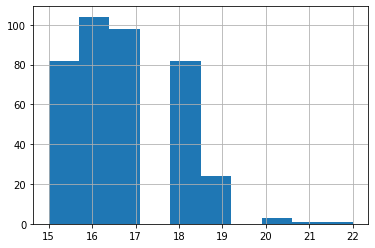

In [7]:
# Age
# # По столбцу возраст нет пропусков
# Заметно уменьшение численности, внутри возрастной группы, начиная с 16 лет
# От 20 лет и старше очень мало детей

math.age.hist()
math.age.describe()

In [8]:
math.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [9]:
# address
# По столбцу адрес есть пропуски
# Большая часть детей живет в городе
# примерно четверть детей за городом

math.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [10]:
# famsize              
# По столбцу 'размер семьи' есть пропуски
# Семей имеющих 2 и более детей большая часть. GT3

pd.DataFrame(math.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [11]:
# Pstatus
# По столбцу 'статус совместного жилья родителей' есть пропуски
# Большинство детей живут в полных семьях, около 11% в неполных

pd.DataFrame(math.Pstatus.value_counts())

,Pstatus
T,314
A,36


In [12]:
# Medu
# По столбцу 'образование матери' есть пропуски
# 

pd.DataFrame(math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<AxesSubplot:>

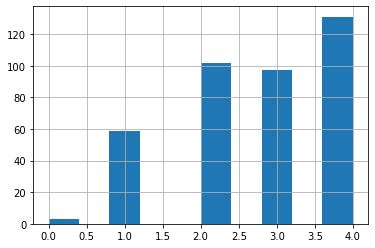

In [13]:
math.Medu.hist()

In [14]:
# Fedu
# По столбцу 'образование отца' есть пропуски

pd.DataFrame(math.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<AxesSubplot:>

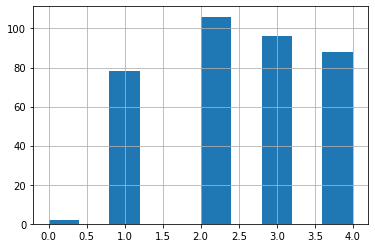

In [15]:
# По образованию мужчин имеем выброс, значение 40.0, устраняем

math = math.loc[math.Fedu <= 4]
math.Fedu.hist()

In [16]:
# Mjob
# По столбцу 'работа матери' есть пропуски
# работа матери

pd.DataFrame(math.Mjob.value_counts())

,Mjob
other,125
services,90
at_home,57
teacher,48
health,31


In [17]:
# Fjob
# По столбцу 'работа отца' есть пропуски
#

pd.DataFrame(math.Fjob.value_counts())

,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


In [18]:
# reason

pd.DataFrame(math.reason.value_counts())

,reason
course,128
reputation,98
home,96
other,32


In [19]:
# guardian

pd.DataFrame(math.guardian.value_counts())

,guardian
mother,236
father,78
other,26


<AxesSubplot:>

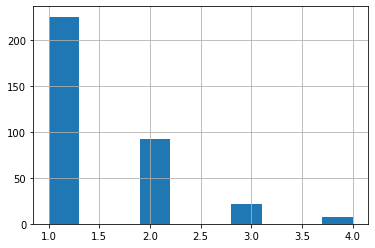

In [20]:
# traveltime
# Больштнство детей быстро добираются до школы

math.traveltime.hist()

<AxesSubplot:>

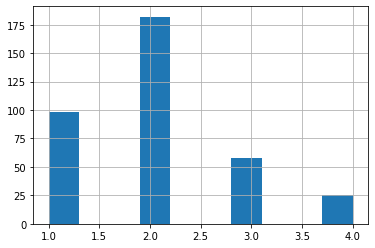

In [21]:
# studytime            

math.studytime.hist()

<AxesSubplot:>

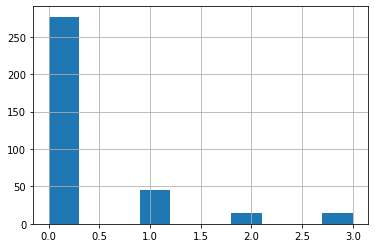

In [22]:
# failures
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

math.failures.hist()

In [23]:
# schoolsup
# дополнительная образовательная поддержка (yes или no)

pd.DataFrame(math.schoolsup.value_counts())

,schoolsup
no,314
yes,47


In [24]:
# famsup
# семейная образовательная поддержка (yes или no)

pd.DataFrame(math.famsup.value_counts())

,famsup
yes,204
no,131


In [25]:
# paid
# дополнительные платные занятия по математике (yes или no)

pd.DataFrame(math.paid.value_counts())

,paid
no,188
yes,145


In [26]:
# activities
# дополнительные внеучебные занятия (yes или no)

pd.DataFrame(math.activities.value_counts())

,activities
yes,180
no,176


In [27]:
# nursery
# посещал детский сад (yes или no)

pd.DataFrame(math.nursery.value_counts())

,nursery
yes,279
no,75


In [28]:
# higher
# хочет получить высшее образование (yes или no)

pd.DataFrame(math.higher.value_counts())

,higher
yes,333
no,19


In [29]:
# internet
# наличие интернета дома (yes или no)

pd.DataFrame(math.internet.value_counts())

,internet
yes,283
no,54


In [30]:
# romantic
# в романтических отношениях (yes или no)

pd.DataFrame(math.romantic.value_counts())

,romantic
no,226
yes,116


<AxesSubplot:>

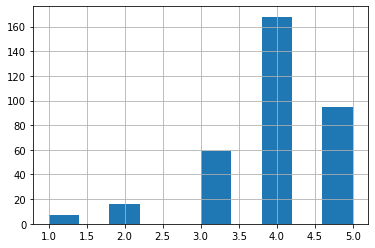

In [31]:
# famrel
# семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# устраняем отрицательные выбросы

math = math.loc[math.famrel >= 1]

math.famrel.hist()

<AxesSubplot:>

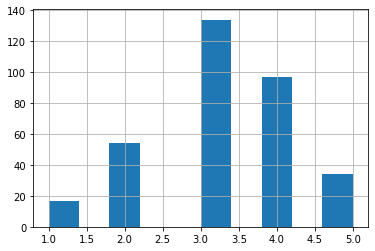

In [32]:
# freetime
# свободное время после школы (от 1 - очень мало до 5 - очень мого)

math.freetime.hist()

<AxesSubplot:>

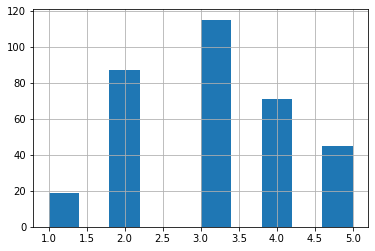

In [33]:
# goout
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

math.goout.hist()

<AxesSubplot:>

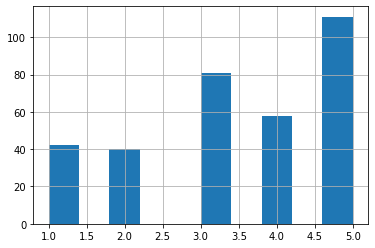

In [34]:
# health
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

math.health.hist()

In [35]:
# absences
# количество пропущенных занятий

pd.DataFrame(math.absences.value_counts()).T

,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,3.0,16.0,7.0,18.0,5.0,20.0,22.0,15.0,1.0,9.0,25.0,54.0,385.0,26.0,56.0,24.0,212.0,13.0,21.0,38.0,40.0,23.0,11.0,17.0,28.0
absences,95,54,47,27,21,14,11,9,8,7,5,4,4,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

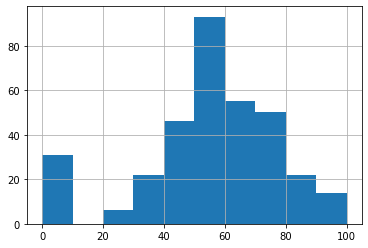

In [36]:
# score
# баллы по госэкзамену по математике

math.score.hist()

In [37]:

pd.DataFrame(math.score.value_counts())

,score
50.0,51
55.0,42
0.0,31
65.0,28
60.0,27
75.0,27
40.0,26
70.0,23
45.0,20
80.0,16


In [45]:
# Корреляционный анализ
# Делаем вывод что числовые значения скоррелированы слабо. Все идут в дело.

math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.155335,-0.168980,0.066752,-0.033474,0.255513,0.033474,0.063349,0.021524,0.107076,-0.062275,0.082868,-0.148832
Medu,-0.155335,1.000000,0.642674,-0.166971,0.092661,-0.237919,-0.092661,-0.024829,0.007366,0.072158,-0.073154,-0.012594,0.205382
Fedu,-0.168980,0.642674,1.000000,-0.189226,0.012119,-0.264906,-0.012119,-0.035788,-0.027291,0.024714,0.010998,0.030154,0.132420
traveltime,0.066752,-0.166971,-0.189226,1.000000,-0.115118,0.061574,0.115118,-0.045855,-0.000118,0.015826,-0.034275,-0.064070,-0.062583
studytime,-0.033474,0.092661,0.012119,-0.115118,1.000000,-0.150694,-1.000000,0.029336,-0.126143,-0.064398,-0.086337,-0.019209,0.120601
failures,0.255513,-0.237919,-0.264906,0.061574,-0.150694,1.000000,0.150694,0.009199,0.113254,0.123837,0.067665,0.059654,-0.331450
"studytime, granular",0.033474,-0.092661,-0.012119,0.115118,-1.000000,0.150694,1.000000,-0.029336,0.126143,0.064398,0.086337,0.019209,-0.120601
famrel,0.063349,-0.024829,-0.035788,-0.045855,0.029336,0.009199,-0.029336,1.000000,0.167233,0.075583,0.101361,-0.080793,0.040078
freetime,0.021524,0.007366,-0.027291,-0.000118,-0.126143,0.113254,0.126143,0.167233,1.000000,0.283055,0.104436,0.028040,0.021726
goout,0.107076,0.072158,0.024714,0.015826,-0.064398,0.123837,0.064398,0.075583,0.283055,1.000000,-0.023786,-0.052891,-0.137584


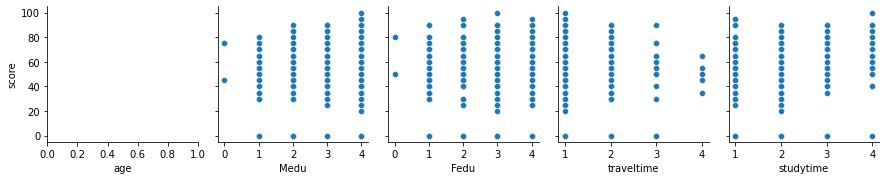

In [54]:
sns.pairplot(math, y_vars=['score'], x_vars=['age', 'Medu', 'Fedu', 'traveltime', 'studytime'])

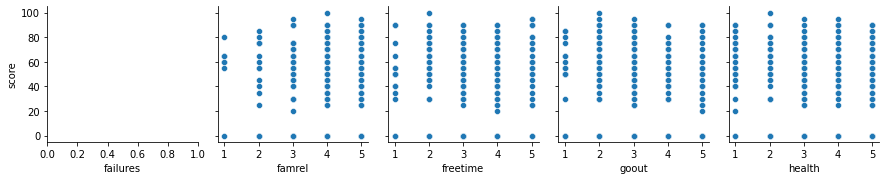

In [55]:
sns.pairplot(math, y_vars=['score'], x_vars=['studytime', 'failures', 'famrel', 'freetime', 'goout'])

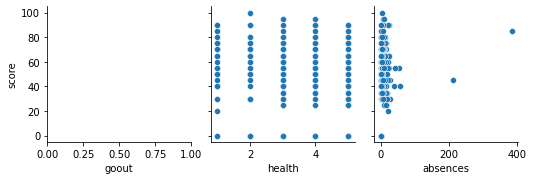

In [57]:
sns.pairplot(math, y_vars=['score'], x_vars=['goout', 'health', 'absences'])

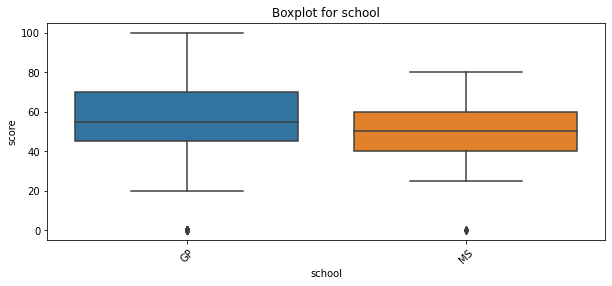

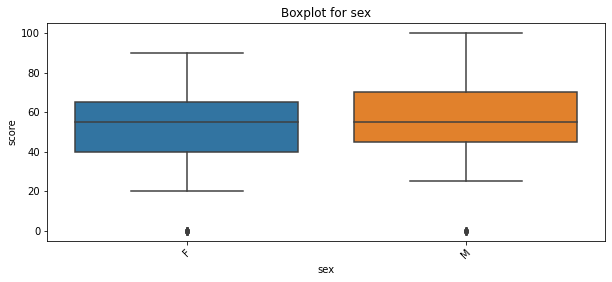

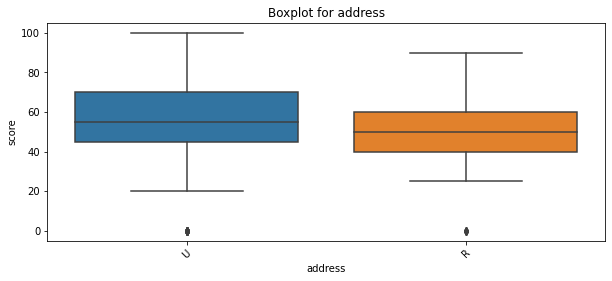

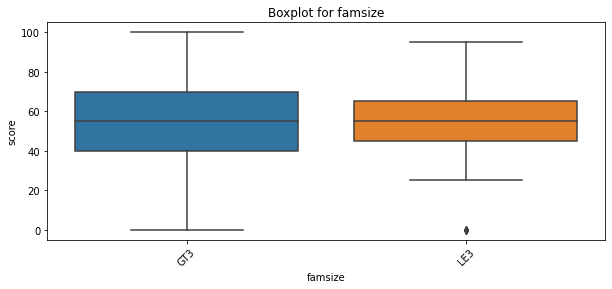

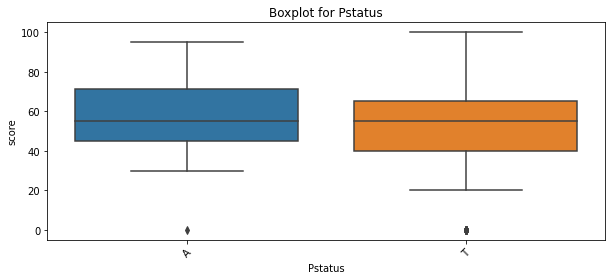

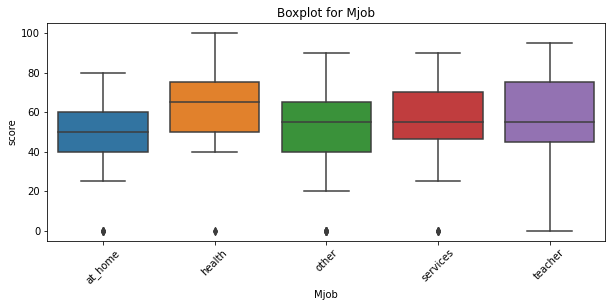

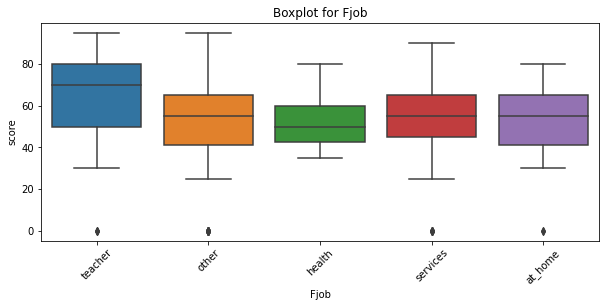

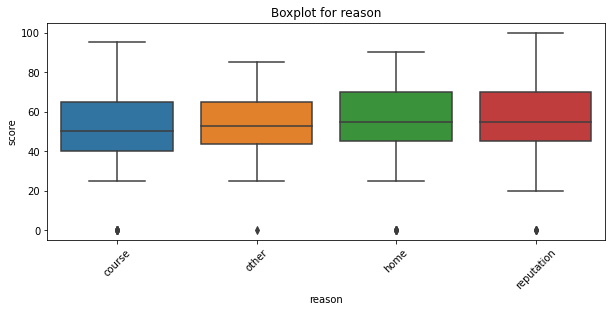

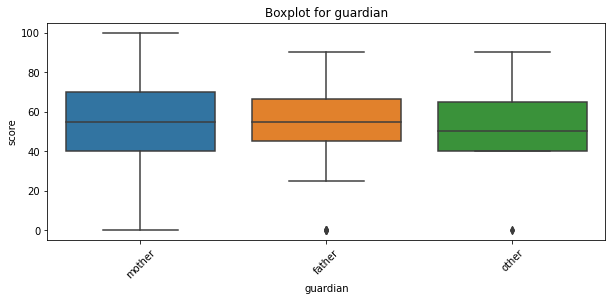

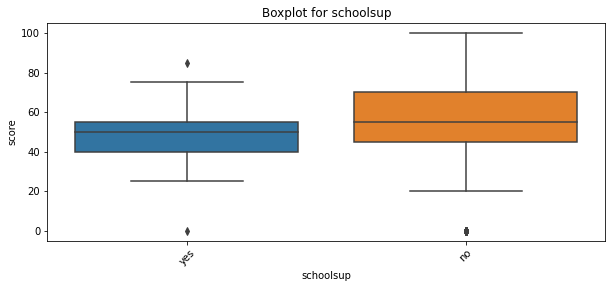

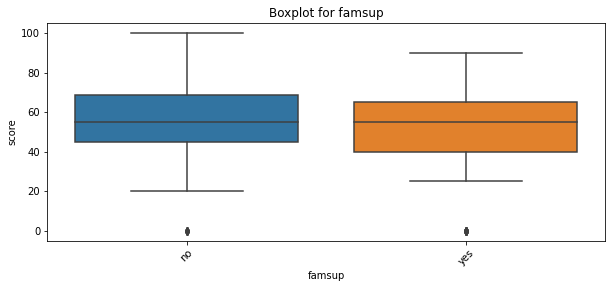

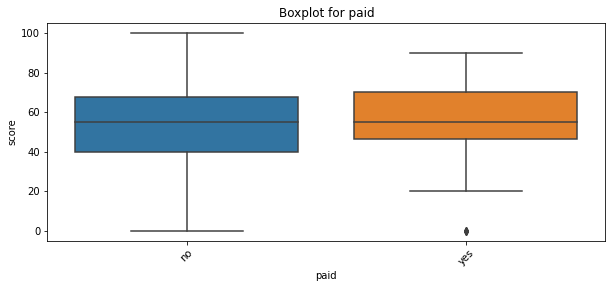

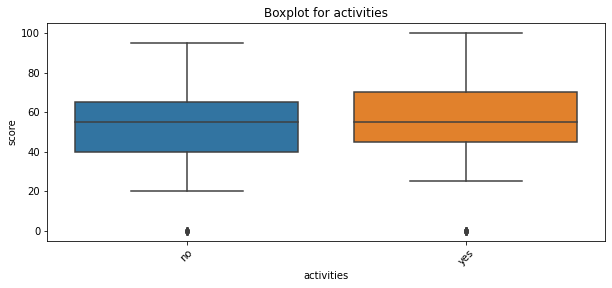

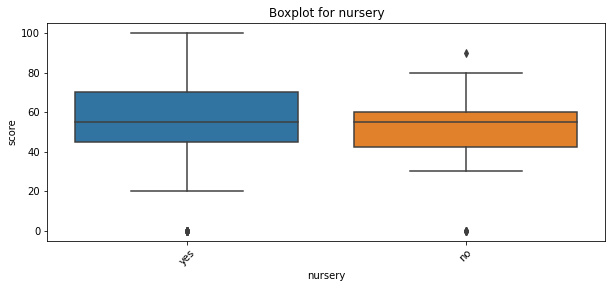

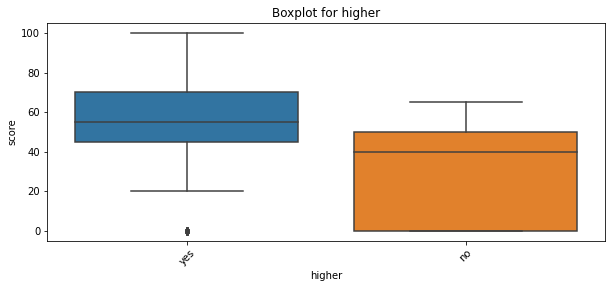

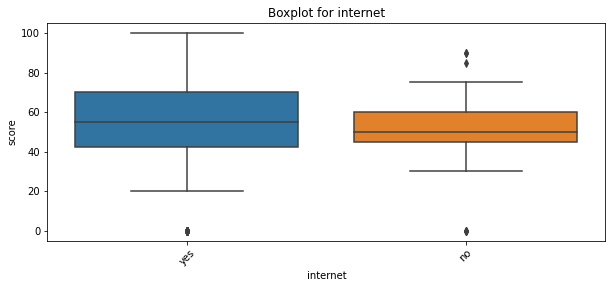

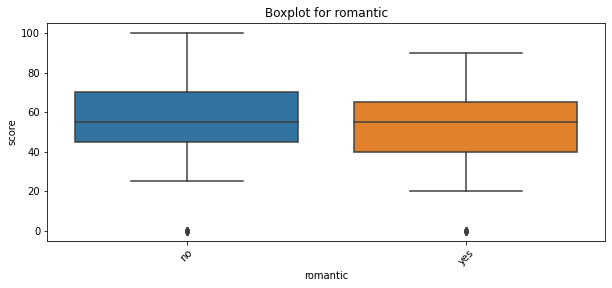

In [70]:
# Анализ номинативных переменных

# display(math.select_dtypes(include='object').columns)

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [90]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.15/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [92]:
math_for_model = math.loc[:, ['Mjob']]
math_for_model.head()

,Mjob
0,at_home
1,at_home
2,at_home
3,health
4,other


In [ ]:
# Вывод
# В результате EDA для анализа влияния условий и параметров жизни школьников на
# итоговую оценку по математике были получены следующие выводы:

# 1. В данных достаточно мало пустых значений
# 2. Имеется небольшое количество выбросов, что позволяет сделать вывод о том, что данные достаточно чистые.
# 3. Для постороения модели предлагается использовать все столбцы типа number и столбец Mjob, 
# как показавший наибольшее значение распределения оценок по номинативным признакам, с помощью теста Стьюдента.